In [12]:
import heapq

# Constants
ROWS, COLS = 8, 12
THRESHOLD_PERCENT = 10
EMPTY_CELL = 0

# Function to calculate Manhattan Distance
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def heuristic(state, total_weight):
    left_weight, right_weight = calculate_weights(state)
    imbalance = abs(left_weight - right_weight)

    # If already balanced, heuristic cost is 0
    if imbalance <= (THRESHOLD_PERCENT / 100) * total_weight:
        return 0

    # Find the Manhattan distance for the smallest weight adjustment
    min_cost = float('inf')
    for row in range(ROWS):
        for col in range(COLS):
            if state[row][col] > 0:  # Only consider non-empty cells
                # Calculate the potential cost of moving this container
                # Move to the opposite side of the grid
                target_col = COLS // 2 - 1 if col >= COLS // 2 else COLS // 2
                for target_row in range(ROWS):
                    if state[target_row][target_col] == EMPTY_CELL:  # Check for empty target
                        move_cost = manhattan_distance(row, col, target_row, target_col)
                        min_cost = min(min_cost, move_cost)

    # Return the smallest cost to move one container as the heuristic
    return min_cost

# Calculate weights of left and right sides
def calculate_weights(state):
    left_weight = sum(state[row][col] for row in range(ROWS) for col in range(COLS // 2))
    right_weight = sum(state[row][col] for row in range(ROWS) for col in range(COLS // 2, COLS))
    return left_weight, right_weight

# Check if the goal is achieved
def is_goal(state, total_weight):
    left_weight, right_weight = calculate_weights(state)
    return abs(left_weight - right_weight) <= (THRESHOLD_PERCENT / 100) * total_weight

# Generate all possible moves (operators)
def generate_moves(state):
    moves = []
    for row in range(ROWS):
        for col in range(COLS):
            if state[row][col] > 0:  # Only consider containers
                # Move Up
                if row > 0 and state[row - 1][col] == EMPTY_CELL:
                    moves.append(((row, col), (row - 1, col), manhattan_distance(row, col, row - 1, col)))
                # Move Down
                if row < ROWS - 1 and state[row + 1][col] == EMPTY_CELL:
                    # Ensure no container above blocks it
                    if all(state[r][col] == EMPTY_CELL for r in range(row + 1, ROWS)):
                        moves.append(((row, col), (row + 1, col), manhattan_distance(row, col, row + 1, col)))
                # Move Left
                if col > 0 and state[row][col - 1] == EMPTY_CELL:
                    moves.append(((row, col), (row, col - 1), manhattan_distance(row, col, row, col - 1)))
                # Move Right
                if col < COLS - 1 and state[row][col + 1] == EMPTY_CELL:
                    moves.append(((row, col), (row, col + 1), manhattan_distance(row, col, row, col + 1)))
    return moves

# Apply a move
def apply_move(state, move):
    (x1, y1), (x2, y2), cost = move
    new_state = [row[:] for row in state]  # Deep copy
    new_state[x2][y2] = new_state[x1][y1]
    new_state[x1][y1] = EMPTY_CELL
    return new_state, cost

# A* Search
def a_star(initial_state):
    total_weight = sum(sum(row) for row in initial_state)
    open_set = []
    heapq.heappush(open_set, (0, initial_state, []))  # (priority, state, path)
    visited = set()

    while open_set:
        priority, current_state, path = heapq.heappop(open_set)

        # Check goal state
        if is_goal(current_state, total_weight):
            return path, current_state

        # Encode state for hashing
        state_tuple = tuple(tuple(row) for row in current_state)
        if state_tuple in visited:
            continue
        visited.add(state_tuple)

        # Generate and evaluate moves
        for move in generate_moves(current_state):
            new_state, move_cost = apply_move(current_state, move)
            new_path = path + [move]
            new_priority = priority + move_cost + heuristic(new_state, total_weight)
            heapq.heappush(open_set, (new_priority, new_state, new_path))

    return None, None

# Function to visualize the grid
def visualize_grid(grid):
    for row in grid:
        print(" ".join(f"{cell:2}" for cell in row))
    print()

# Main Program
initial_state = [
    [14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [10,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]
]

# Display initial state
print("Before Balancing:")
visualize_grid(initial_state)
initial_left, initial_right = calculate_weights(initial_state)
total_weight = initial_left + initial_right
threshold = (THRESHOLD_PERCENT / 100) * total_weight
difference = abs(initial_left - initial_right)
is_initial_balanced = difference <= threshold
print(f"Initial Left Weight: {initial_left} kg")
print(f"Initial Right Weight: {initial_right} kg")
print(f"Threshold Difference Allowed: {threshold:.2f} kg")
print(f"Current Difference: {difference:.2f} kg")
print(f"Balanced: {'Yes' if is_initial_balanced else 'No'}\n")

# Run A* algorithm
optimal_moves, final_state = a_star(initial_state)

if optimal_moves:
    print("After Balancing:")
    visualize_grid(final_state)
    final_left, final_right = calculate_weights(final_state)
    final_difference = abs(final_left - final_right)
    print(f"Time Taken to Balance: {sum(move[2] for move in optimal_moves)} mins")
    print(f"Total Number of Moves: {len(optimal_moves)}")
    print("Optimal Moves List:")
    for move in optimal_moves:
        print(f"  Move container from {move[0]} to {move[1]} (Cost: {move[2]} mins)")
    print(f"Final Left Weight: {final_left} kg")
    print(f"Final Right Weight: {final_right} kg")
    print(f"Threshold Difference Allowed: {threshold:.2f} kg")
    print(f"Final Difference: {final_difference:.2f} kg")
    is_final_balanced = final_difference <= threshold
    print(f"Balanced: {'Yes' if is_final_balanced else 'No'}")
else:
    print("No solution found!")


Before Balancing:
14  0  0  0  0  0  0  0  0  0  0  0
10  4  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0

Initial Left Weight: 28 kg
Initial Right Weight: 0 kg
Threshold Difference Allowed: 2.80 kg
Current Difference: 28.00 kg
Balanced: No

After Balancing:
 0  0  0  0  0  0 14  0  0  0  0  0
10  4  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0

Time Taken to Balance: 6 mins
Total Number of Moves: 6
Optimal Moves List:
  Move container from (0, 0) to (0, 1) (Cost: 1 mins)
  Move container from (0, 1) to (0, 2) (Cost: 1 mins)
  Move container from (0, 2) to (0, 3) (Cost: 1 mins)
  Move containe

Before Balancing:


C:\Users\vsaiy\AppData\Local\Temp\ipykernel_15188\767490683.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j - 0.5, len(grid) - i - 1.5), 1, 1, color=color, edgecolor='black'))


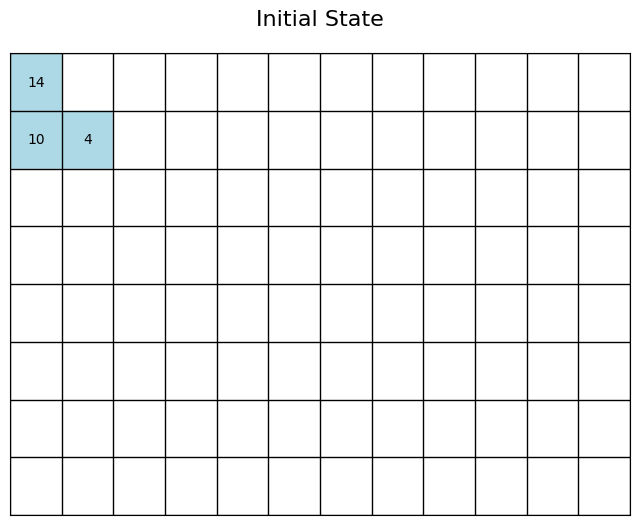

After Balancing:


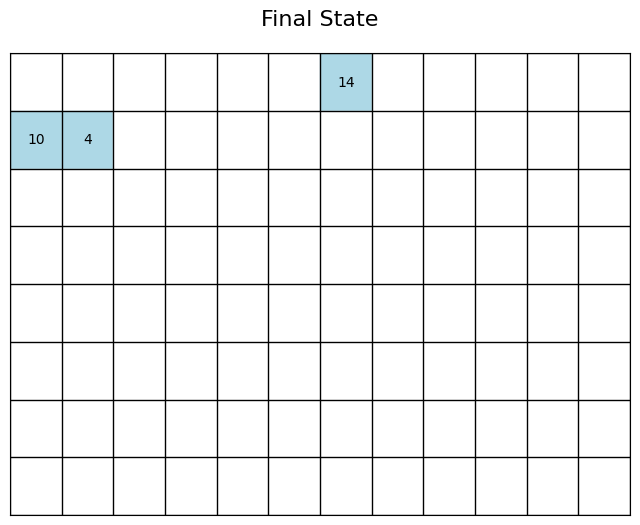

Time Taken to Balance: 6 mins
Total Number of Moves: 6
Optimal Moves List:
  Move container from (0, 0) to (0, 1) (Cost: 1 mins)
  Move container from (0, 1) to (0, 2) (Cost: 1 mins)
  Move container from (0, 2) to (0, 3) (Cost: 1 mins)
  Move container from (0, 3) to (0, 4) (Cost: 1 mins)
  Move container from (0, 4) to (0, 5) (Cost: 1 mins)
  Move container from (0, 5) to (0, 6) (Cost: 1 mins)
Final Left Weight: 14 kg
Final Right Weight: 14 kg
Threshold Difference Allowed: 2.80 kg
Final Difference: 0.00 kg
Balanced: Yes


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the grid using matplotlib
def visualize_grid(grid, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xticks(np.arange(-0.5, len(grid[0]), 1), minor=False)
    ax.set_yticks(np.arange(-0.5, len(grid), 1), minor=False)
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)
    ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # Create the grid cells
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            weight = grid[i][j]
            color = 'white' if weight == 0 else 'lightblue'
            ax.add_patch(plt.Rectangle((j - 0.5, len(grid) - i - 1.5), 1, 1, color=color, edgecolor='black'))
            if weight > 0:
                ax.text(j, len(grid) - i - 1, str(weight), va='center', ha='center', fontsize=10, color='black')

    plt.show()

# Display initial state
print("Before Balancing:")
visualize_grid(initial_state, "Initial State")

# Run the A* algorithm
optimal_moves, final_state = a_star(initial_state)

if optimal_moves:
    # Display final state
    print("After Balancing:")
    visualize_grid(final_state, "Final State")
    final_left, final_right = calculate_weights(final_state)
    final_difference = abs(final_left - final_right)
    print(f"Time Taken to Balance: {sum(move[2] for move in optimal_moves)} mins")
    print(f"Total Number of Moves: {len(optimal_moves)}")
    print("Optimal Moves List:")
    for move in optimal_moves:
        print(f"  Move container from {move[0]} to {move[1]} (Cost: {move[2]} mins)")
    print(f"Final Left Weight: {final_left} kg")
    print(f"Final Right Weight: {final_right} kg")
    print(f"Threshold Difference Allowed: {threshold:.2f} kg")
    print(f"Final Difference: {final_difference:.2f} kg")
    is_final_balanced = final_difference <= threshold
    print(f"Balanced: {'Yes' if is_final_balanced else 'No'}")
else:
    print("No solution found!")
